## **Proporção de Deputados por Sexo**

#### Este notebook apresenta representações visuais da distribuição dos atuais deputados por sexo em função de estado, partido e espectro ideológico.

In [1]:
from DadosAbertosBrasil import camara
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import requests
from bs4 import BeautifulSoup

#### 1. Obter lista de deputados
A API não trás uma coluna para o sexo do deputado, então precisamos rodar a classe 'Deputados' duas vezes utilizando os dois parâmetros 'sexo' e adicionar a coluna manualmente.

In [2]:
m = camara.lista_deputados(sexo='M')
m['sexo'] = 'M'

f = camara.lista_deputados(sexo='F')
f['sexo'] = 'F'

dep = pd.concat([m, f])[['nome', 'siglaPartido', 'siglaUf', 'sexo']]
display(dep.sample(10))

,nome,siglaPartido,siglaUf,sexo
74,Tabata Amaral,PDT,SP,F
284,Márcio Labre,PSL,RJ,M
23,Edna Henrique,PSDB,PB,F
26,Fernanda Melchionna,PSOL,RS,F
27,Flávia Arruda,PL,DF,F
24,Aliel Machado,PSB,PR,M
146,Fábio Mitidieri,PSD,SE,M
61,Capitão Alberto Neto,REPUBLICANOS,AM,M
39,Lauriete,PSC,ES,F
242,Junio Amaral,PSL,MG,M


#### 2. Proporção **Sexo por Estado**

In [3]:
# Agrupar e contar deputados por estado e por sexo
dep1 = dep[['siglaUf', 'sexo', 'nome']] \
    .groupby(['siglaUf', 'sexo'], as_index=False).count()

# Pivotar tabela
dep1 = dep1.pivot(
    index = 'siglaUf',
    columns = 'sexo',
    values = 'nome'
).fillna(0).astype(int)

# Calcular e ordenar por proporção de mulheres
dep1['P'] = dep1.F / (dep1.F + dep1. M)
dep1.sort_values(by='P', inplace=True)

display(dep1)

sexo,F,M,P
siglaUf,,,
MA,0,18,0.000000
AM,0,8,0.000000
SE,0,8,0.000000
PE,1,24,0.040000
CE,1,21,0.045455
MG,3,50,0.056604
BA,3,36,0.076923
PB,1,11,0.083333
RS,3,28,0.096774


#### 3. Proporção **Sexo por Partido**

In [4]:
# Agrupar e contar deputados por estado e por sexo
dep2 = dep[['siglaPartido', 'sexo', 'nome']] \
    .groupby(['siglaPartido', 'sexo'], as_index=False).count()

# Pivotar tabela
dep2 = dep2.pivot(
    index = 'siglaPartido',
    columns = 'sexo',
    values = 'nome'
).fillna(0).astype(int)

# Calcular e ordenar por proporção de mulheres
dep2['P'] = dep2.F / (dep2.F + dep2. M)
dep2.sort_values(by='P', inplace=True)

display(dep2)

sexo,F,M,P
siglaPartido,,,
PATRIOTA,0,6,0.000000
PSD,1,34,0.028571
DEM,2,27,0.068966
PTB,1,10,0.090909
REPUBLICANOS,3,29,0.093750
PODE,1,9,0.100000
PSB,3,27,0.100000
PSC,1,9,0.100000
PDT,3,23,0.115385


#### 4. Proporção **Sexo por Ideologia**

In [5]:
# Data scrapping: Ideologia dos partidos, segundo Congresso em Foco (2019)
url = "https://pt.wikipedia.org/wiki/Lista_de_partidos_políticos_do_Brasil"
res = requests.get(url).text
tables = BeautifulSoup(res,'lxml').findAll('table', class_='wikitable')
rows = tables[1].findAll('tr')

espectro = pd.DataFrame(
    [[i.findAll('td')[0].text[:-1], i.findAll('td')[7].text[:-1]] for i in rows[1:]],
    columns=['Partido', 'Ideologia']
)

display(espectro)

,Partido,Ideologia
0,Avante,centro
1,DC,direita
2,DEM,direita
3,MDB,centro
4,NOVO,direita
5,Patriota,direita
6,PCB,—
7,PCdoB,esquerda
8,PCO,—
9,PDT,esquerda


In [6]:
# Colocar todos os caracteres em letras maiúsculas antes do merge, para coincidir as siglas
espectro.Partido = espectro.Partido.str.upper()
dep2.reset_index(inplace=True)
dep2.siglaPartido = dep2.siglaPartido.str.upper()

# Unificar os dois DataFrames
dep3 = dep2.merge(
    right = espectro,
    how = 'left',
    left_on = 'siglaPartido',
    right_on = 'Partido'
)

# Agrupar e calcular por ideologia
dep3 = dep3[['Ideologia', 'F', 'M']].groupby('Ideologia').sum()
dep3['P'] = dep3.F / (dep3.F + dep3.M)
dep3.sort_values(by='P', inplace=True)

display(dep3)

,F,M,P
Ideologia,,,
direita,30,245,0.109091
centro,19,81,0.190000
esquerda,29,109,0.210145


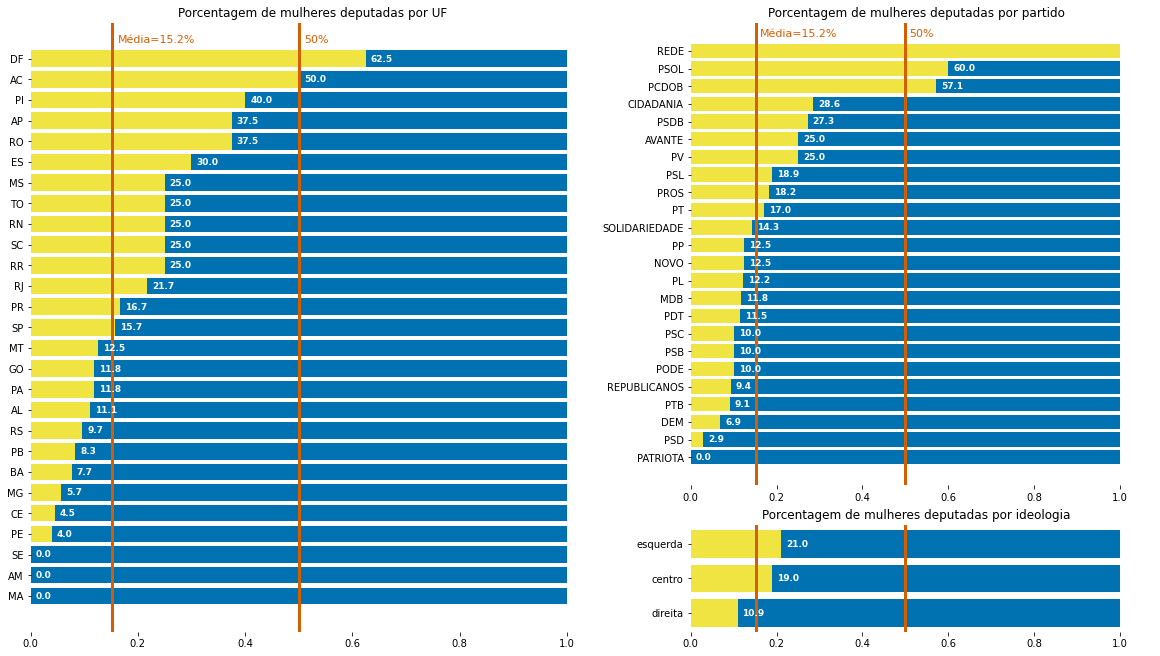

In [7]:
# Remover spines
mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = False


# Formatar grid
fig = plt.figure(constrained_layout=True, figsize=(16,9))
gs = fig.add_gridspec(16, 9)
ax1 = fig.add_subplot(gs[:, :5])
ax2 = fig.add_subplot(gs[:13, 5:])
ax3 = fig.add_subplot(gs[13:, 5:])


# Média
media = dep[dep.sexo == 'F'].sexo.count() / dep.sexo.count()


# Gráfico 1: Por UF
ax1.barh(dep1.index, [1 for _ in dep1.index], color='#0072B2')
ax1.barh(dep1.index, dep1.P, color='#F0E442')
ax1.axvline(media, lw=3, color='#D55E00')
ax1.text(media + 0.01, 26.8, f'Média={100*media:,.1f}%', color='#D55E00', size=11)
ax1.axvline(0.5, lw=3, color='#D55E00')
ax1.text(0.51, 26.8, '50%', color='#D55E00', size=11)
ax1.set_title('Porcentagem de mulheres deputadas por UF')

rects = ax1.patches
for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    label = f'{round(100*x_value, 1)}'
    ax1.annotate(
        label,
        (x_value, y_value),
        xytext = (5, 0),
        textcoords = "offset points",
        va = 'center',
        ha = 'left',
        color = 'white',
        size = 9,
        weight = 'bold'
    )


# Gráfico 2: Por Partido
ax2.barh(dep2.siglaPartido, [1 for _ in dep2.siglaPartido], color='#0072B2')
ax2.barh(dep2.siglaPartido, dep2.P, color='#F0E442')
ax2.axvline(media, lw=3, color='#D55E00')
ax2.text(media + 0.01, 23.8, f'Média={round(100*media, 1)}%', color='#D55E00', size=11)
ax2.axvline(0.5, lw=3, color='#D55E00')
ax2.text(0.51, 23.8, '50%', color='#D55E00', size=11)
ax2.set_title('Porcentagem de mulheres deputadas por partido')

rects = ax2.patches
for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    label = f'{round(100*x_value, 1)}'
    ax2.annotate(
        label,
        (x_value, y_value),
        xytext = (5, 0),
        textcoords = "offset points",
        va = 'center',
        ha = 'left',
        color = 'white',
        size = 9,
        weight = 'bold'
    )


# Gráfico 3: Por ideologia
ax3.barh(dep3.index, [1 for _ in dep3.index], color='#0072B2')
ax3.barh(dep3.index, dep3.P, color='#F0E442')
ax3.axvline(media, lw=3, color='#D55E00')
ax3.axvline(0.5, lw=3, color='#D55E00')
ax3.set_title('Porcentagem de mulheres deputadas por ideologia')

rects = ax3.patches
for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    label = f'{round(100*x_value, 1)}'
    ax3.annotate(
        label,
        (x_value, y_value),
        xytext = (5, 0),
        textcoords = "offset points",
        va = 'center',
        ha = 'left',
        color = 'white',
        size = 9,
        weight = 'bold'
    )